# Problema 1

Un equipo de desarrollo está evaluando la eficiencia de un nuevo algoritmo implementado en *Python*. Han medido el tiempo de ejecución del algoritmo en función de la cantidad de elementos de entrada, obteniendo los resultados que se muestran en la siguiente tabla:

<p><center>

| Cantidad de elementos (unidades) | Tiempo de ejecución (ms) |
|----------------------------------|--------------------------|
|$$ 100 $$                         | $$2 $$                   |
|$$ 200 $$                         | $$4 $$                   |
|$$ 500 $$                         | $$10 $$                  |
|$$ 1.000 $$                        | $$20 $$                  |
|$$ 2.000 $$                        | $$40 $$                  |

</center></p>

1. Defina variable dependiente e independiente, indicando unidad de medida.
2. Encuentra la función que relaciona el tamaño de la entrada con el tiempo de ejecución del algoritmo, para esto utiliza la función *polyfit* de *Numpy*.
3. Calcula el tiempo de ejecución para una entrada de $1.500$ elementos.
4. Utiliza la función *fsolve* de *Scipy* para determinar el tamaño de entrada que haría que el tiempo de ejecución sea de $50$ milisegundos.


0.020000000000000004
6.4660760322944724e-15


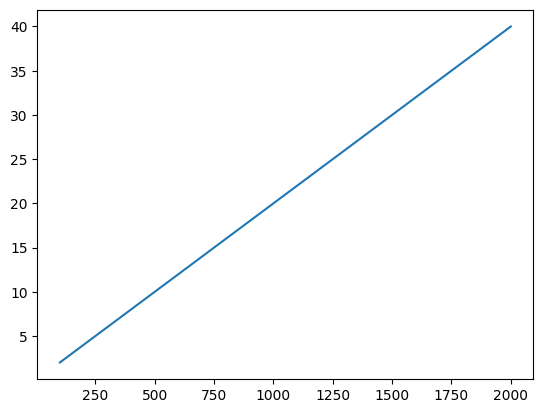

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([100,200,500,1000,2000])
y = np.array([2,4,10,20,40])

pendiente, intercepto = np.polyfit(x,y,1);

print((pendiente))
print((intercepto))

plt.plot(x,y);
plt.show()

In [15]:
from scipy.optimize import fsolve
def f(x):
    return pendiente*x+intercepto;
print(f(1500))
def cero(x):
    return f(x)-50;
print(fsolve(cero, 0))


30.000000000000014
[2500.]


# Problema 2

Un equipo de TI está monitoreando el tráfico de datos en la red de la empresa. Han registrado el volumen de los datos transferidos y el tiempo que tomó cada transferencia en la siguiente tabla de datos:

<p><center>

|Datos transferidos (GB) | Tiempo de transferencia (min)|
|------------------------|------------------------------|
|$$5$$                   |$$10$$                        |
|$$10$$                  |$$20$$                        |
|$$25$$                  |$$50$$                        |
|$$50$$                  |$$100$$                       |
|$$100$$                 |$$200$$                       |

</center></p>

1. Defina variable dependiente e independiente, indicando unidad de medida.
2. Utilizando la función *polyfit* de *Numpy* encuentra la función que modela el tiempo de transferencia $T(x)$ en función del volumen de los datos transferidos.
3. Interprete la pendiente en el contexto del problema.
4. ¿Cuánto tiempo toma una transferencia de $73,2$ GB?
5. Utiliza la función *fsolve* de *Scipy* para determinar la cantidad de datos que se puedan transferir en $123,5$ minutos.
6. Grafica la función $T(x)$ indicando el nombre de los ejes y su unidad de medida. Interpreta lo observado. *Para graficar utiliza la biblioteca Matplotlib.*

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

datosTransferidos = np.array([5,10,25,50,100]);
tiempoTransferencia = np.array([10,20,50,100,200]);

pendiente, intercepto = np.polyfit(datosTransferidos, tiempoTransferencia,1);
def t(x):
    return pendiente*x+intercepto;

print(t(10))

20.000000000000046


# Problema 3


Una empresa de tecnología quiere optimizar el tiempo de carga y descarga de archivos en su servicio de almacenamiento en la nube. Los tiempos medios para diferentes tamaños de archivos son los siguientes:

<p><center>

| Tamaño del archivo (MB) | Tiempo de carga (s) | Tiempo de descarga (s)|
|-------------------------|---------------------|-----------------------|
|$$50$$                   |$$10$$               |$$8$$                  |
|$$100$$                  |$$20$$               |$$16$$                 |
|$$250$$                  |$$50$$               |$$40$$                 |
|$$500$$                  |$$100$$              |$$80$$                 |
|$$1.000$$                 |$$200$$              |$$160$$                |

</center></p>

1. Encuentra las funciones que modelan el tiempo de carga $f(x)$ y el tiempo de descarga $g(x)$ en función del tamaño del archivo $x$. Utiliza la función *polyfit* de *Numpy* (debes encontrar dos funciones).
2. Define variable dependiente e independiente, para ambas funciones, indicando su unidad de medida.
3. Calcula el tiempo de carga y descarga para un archivo de $750$ MB.
4. Utiliza la función *fsolve* de *Scipy* para determinar el tamaño del archivo si el tiempo de carga es de $163$ segundos.
5. Un trabajador insiste en que si el tiempo de descarga es de $195$ segundos, el tamaño del archivo es $1.200$ MB. ¿Tiene razón? Utiliza *Python* para determinar.
6. Grafica ambas funciones en el mismo gráfico, indicando nombre de los ejes y unidades de medida. Utiliza la librería *Matplotlib* para graficar.

Tiempo de carga para un archivo de 750MB: 150 segundos
Tiempo de descarga para un archivo de 750MB: 120 segundos
[815.]
False


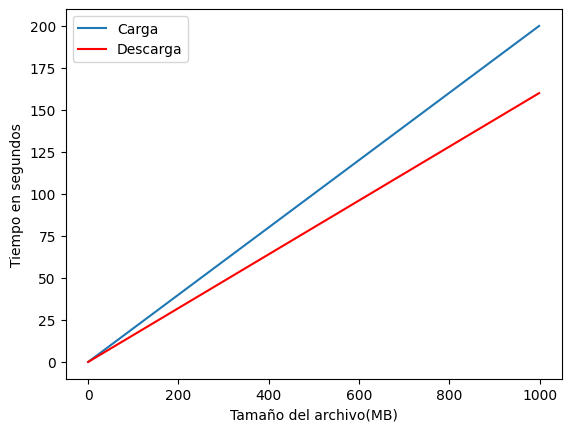

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

x = np.array([50,100,250,500,1000]);
tiempoCarga = np.array([10,20,50,100,200]);
tiempoDescarga = np.array([8,16,40,80,160]);
pendienteCarga, interceptoCarga = np.polyfit(x,tiempoCarga, 1);
pendienteDescarga, interceptoDescarga = np.polyfit(x,tiempoDescarga, 1);
def carga(x):
    return pendienteCarga*x+interceptoCarga;
def descarga(x):
    return pendienteDescarga*x+interceptoDescarga;


print(f"Tiempo de carga para un archivo de 750MB: {round(carga(750))} segundos")
print(f"Tiempo de descarga para un archivo de 750MB: {round(descarga(750))} segundos")


def zerocarga(x):
    return (carga(x))-163;
sol = fsolve(zerocarga, 0)
print(sol)


print(round(descarga(1200)) == 195)


graf = np.arange(0,1000,1);
plt.plot(graf, carga(graf), label="Carga");
plt.plot(graf,descarga(graf), label="Descarga", color="red");
plt.xlabel("Tamaño del archivo(MB)");
plt.ylabel("Tiempo en segundos")
plt.legend();
plt.show();

# Problema 4

El uso de memoria $M(x)$ (en GB) de un servidor en función del número de usuarios activos $x$ está dado por la función lineal:

 $$M(x) = 0.5x + 2$$

1. Determina la variable dependiente e independiente, indicando unidad de medida.
2. Identifica e interpreta la pendiente de la función.
3. ¿Cuánta memoria del servidor está en uso cuando no hay usuarios activos?
4. ¿Cuánta memoria del servidor está en uso cuando hay $637$ usuarios activos?
5. Utiliza *Python* para determinar cuántos usuarios activos provocan un uso de memoria de $32$ GB.
6. ¿Es posible un uso de memoria de $59,8$ GB?

In [28]:
#Dependiente: uso de memoria en GB
#Independiente: numero de usuarios

#Pendiente: 0.5
#Intercepto: 2
def memoria(x):
    return 0.5*x+2;
print(memoria(0))
print(memoria(637))

from scipy.optimize import fsolve
def zeromemoria(x):
    return memoria(x)-32;
sol = fsolve(zeromemoria, 0)
print(sol)


from scipy.optimize import fsolve
def zeromemoria(x):
    return memoria(x)-59.8;
sol = fsolve(zeromemoria, 0)
print(sol)
#No seria posible

2.0
320.5
[60.]
[115.6]


# Problema 5

El costo de operación mensual $C(x)$ (en miles de dólares) de un data center en función del número de servidores $x$ está dado por la función lineal:

 $$C(x) = 1,5x + 10$$

1. Determine la variable dependiente e independiente, indicando unidad de medida.
2. ¿Qué representa la pendiente en el contexto del problema?
3. ¿Qué representa el intercepto en el contexto del problema?
4. Calcula el costo de operación cuando hay $47$ servidores.
5. Determina cuántos servidores hay cuando el costo de operación es de $92.500$ dólares. Utiliza *Python* para resolver.


In [32]:
# Dependiente: costo de operacion mensial en miles de dolares de un data center
# Independiente: numero de servidores en numeros enteros desde el cero al infinito

#La pendiente representa el costo por cada servidor 
#EL intercepto representa el capital inicial que se necesita para iniciar operaciones en un data center

def c(x):
    return 1.5*x+10;
print(c(47))

from scipy.optimize import fsolve
def zeroc(x):
    return c(x)-92.5;

sol = fsolve(zeroc, 0)
print(sol[0])

80.5
55.0


# Problema 6

El número de visitas diarias $V(x)$ en un sitio web, en función del número de campañas publicitarias $x$, está modelado por la función:

$$V(x) = 300x + 500$$

Los administradores del sitio consideran contratar $20$ campañas publicitarias como máximo.

1. Defina variable dependiente e independiente del problema, indicando unidad de medida.
2. Determine el dominio contextualizado de la función.
3. Interprete la pendiente de la función en el contexto del problema.
4. Determine la cantidad de visitas diarias cuando se ejecutan $5$ campañas publicitarias.
5. Utilizando la función *fsolve* de *Scipy* responde: ¿cuántas campañas publicitarias se deben ejecutar para alcanzar $4.700$ visitas diarias?

In [34]:
# Dependiente: numero de visitas en un sitio web
# Independiente: numero de campañas publicitarias

#Dominio= 0 hasta infinito positivo

#pendiente: por cada campana publicitaria el numero de visitas diarias del sitio web  aumenta en 300
#intercepto: el sitio web tiene 500 visitas diarias como base

def v(x):
    return 300*x+500;

print(v(5))

from scipy.optimize import fsolve
def zerov(x):
    return v(x)-4700;
sol=fsolve(zerov, 0);
print(sol[0])

2000
14.0


# Problema 7

La depreciación es el proceso en que los activos físicos, como la maquinaria, vehículos, equipos, etc., pierden valor con el tiempo debido a factores como el desgaste, el uso y la obsolescencia. El valor estimado que tendrá el activo al final de su vida útil se conoce como *valor residual*.

En este contexto, sabemos que el valor residual $R(t)$ (en miles de dólares) de un equipo tecnológico está modelado por la función lineal:

$$R(t) = -1,2t + 10$$

donde $t$ corresponde a la antigüedad del equipo (en años).

1. Defina variable dependiente e independiente, indicando unidad de medida.
2. ¿Qué representa la pendiente de la función en el contexto del problema?
3. ¿Cuál es el valor residual inicial del equipo?
4. Determine el dominio contextualizado de la función, si sabe que el valor del equipo al final de su vida útil es de $400$ dólares.
5. Determina, utilizando la función *def* de *Python*, el valor residual del equipo con $3$ años y seis meses de antigüedad.
6. Determina, utilizando la función *fsolve*  de *Scipy*, la antigüedad del equipo cuando su valor residual es de $4.000$ dólares.
7. Grafica la función utilizando la biblioteca *Matplotlib*. Interpreta lo observado.

6.4
9.4
-3325.0


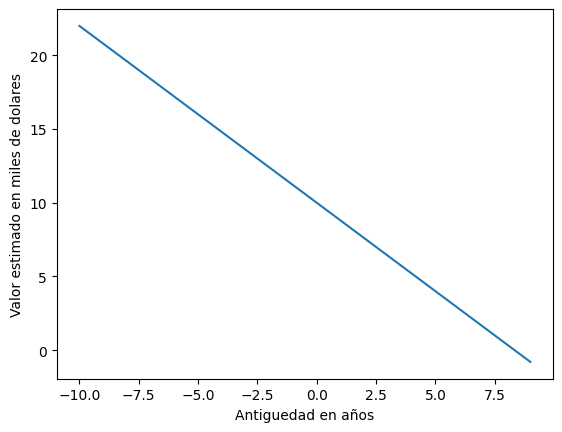

In [40]:
# Dependiente: valor residual, en miles de dolares
# Independiente: antiguedad del equipo, en años

#Pendiente: dinero, valor que pierde por cada año
#El valor residual inicial del equipo es de 10

def r(t):
    return -1.2*t+10
def mesAnio(mes):
    return mes/12;
print(r(3))
print(r(mesAnio(6)))

from scipy.optimize import fsolve
def zeror(x):
    return r(x)-4000;
print(fsolve(zeror,0)[0])

import matplotlib.pyplot as plt
g = np.arange(-10, 10, 1);
plt.plot(g, r(g));
plt.xlabel("Antiguedad en años")
plt.ylabel("Valor estimado en miles de dolares")
plt.show()

# Problema 8

El tiempo de ejecución $T(x)$ (en milisegundos) de un algoritmo depende de la cantidad de elementos de entrada (en unidades) mediante una función lineal cuya gráfica se muestra en la siguiente imagen:

<br>

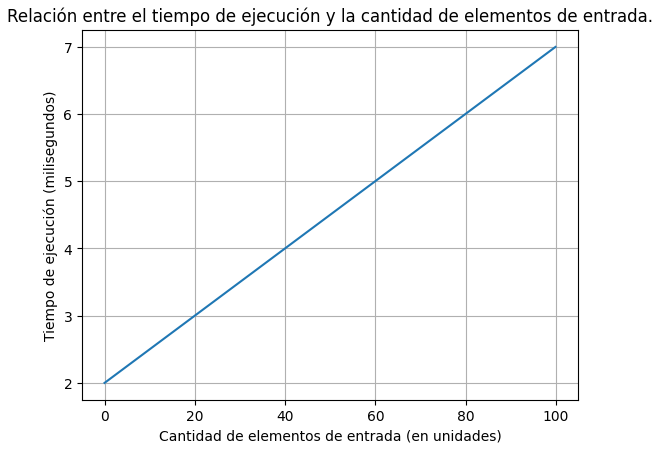

<br>

1. Determina la forma algebraica de la función que mejor se ajusta al gráfico. Utiliza la función polyfit de Scipy para calcular.
2. Determina el tiempo de ejecución del algoritmo para $67$ elementos de entrada.
3. ¿Cuántos elementos de entrada se utilizaron si el tiempo de ejecución fue de $6,4$ milisegundos?

In [19]:
import numpy as np

x = np.array([0,20,40,60,80,100])
y = np.array([2,3,4,5,6,7])
pendiente, intercepto = np.polyfit(x,y,1);
def t(x):
    return pendiente*x+intercepto;
print(t(67))

def cero(x):
    return t(x)-6.4;
sol=(fsolve(cero,0))
print(sol[0])

5.349999999999999
88.00000000000004


# Problema 9

El consumo de energía de un servidor $E(t)$  en función del tiempo $t$ después de implementar una optimización, está modelado por la función lineal que se observa en el siguiente gráfico:

<br>

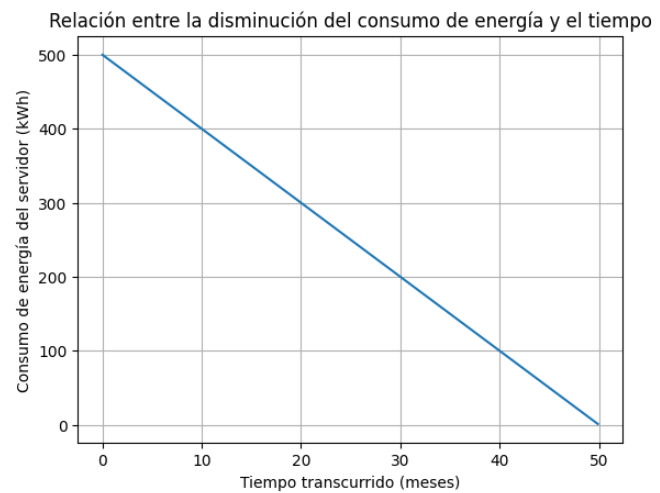

<br>

1. Utiliza la función *polyfit* de *Numpy* para determinar la forma algebraica que mejor se ajusta al gráfico.
2. Interprete la pendiente en el contexto del problema.
3. Determine el consumo de energía luego de un año desde que se implementó la optimización.
4. Encuentre el tiempo transcurrido desde la implementación de la optimización para que la energía consumida sea de $200$ kWh.

In [27]:
import numpy as np
from scipy.optimize import fsolve

x = np.array([0,10,20,30,40,50])
y= np.array([500,400,300,200,100,0])

pendiente, intercepto = np.polyfit(x,y,1)
def e(t):
    return pendiente*t+intercepto;
#en un año
print(e(12))

def zero(x):
    return e(x)-200;
sol=fsolve(zero,0);
print(sol[0])

380.0
30.0
200.0


# Problema 10

Dos atletas profesionales corren por un camino recto. Durante los primeros $10$ segundos del trayecto, la distancia recorrida (en metros) por el atleta $1$ está dada por la función:

$$g(t) = 0,7t^{2}$$

mientras que la distancia recorrida por el atleta $2$ está dada por la función:

$$f(t) = 10t $$

donde $t$ corresponde al tiempo transcurrido (en segundos) desde el inicio del trayecto.

<br>

1. ¿Cuál de los dos atletas siempre mantuvo una velocidad constante? Justifique. *Recomendación: grafica las funciones utilizando Matlplotlib.*
2. Si la meta se encontraba a $100$ metros de la partida ¿cuál atleta llega primero?
3. ¿A qué distancia se encontraban uno del otro cuando transcurren $8$ segundos? ¿Y cuando transcurren $10$ segundos?
4. Entre el segundo $8$ y el $10$, ¿cuál atleta iba más rápido? Justifique apropiadamente.

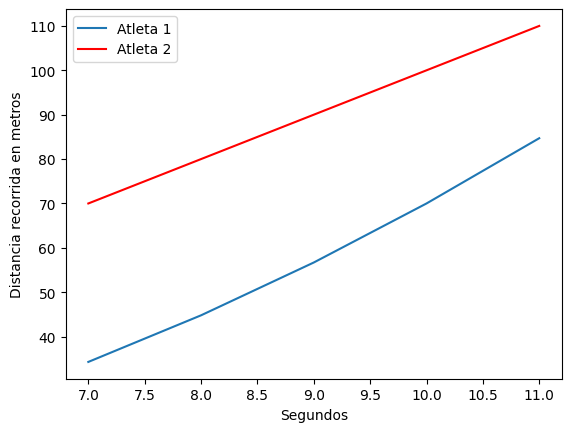

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def g(t):
    return 0.7*t**2;
def f(t):
    return 10*t;

t = np.arange(7,12,1);
plt.plot(t,g(t), label="Atleta 1");
plt.plot(t,f(t), label="Atleta 2", color="red");
plt.xlabel("Segundos");
plt.ylabel("Distancia recorrida en metros");
plt.legend();
plt.show();

# Problema 11

Un *Data Center* ha cotizado el costo de desarrollar un proyecto con dos empresas. El costo (en millones de pesos) entregado por la empresa $1$ está modelado por la función:

$$C_{1}(t) = 12t + 50$$

y costo (en millones de pesos) entregado por la empresa $2$ está modelado por la función:

$$C_{2}(t) = 8t + 100$$

donde $t$ corresponde al tiempo que demoren en realizar el proyecto (en semanas).

<br>

1. Utilizando la biblioteca *Matplotlib* grafique ambas funciones, indicando el nombre de los ejes coordenados junto con su unidad de medida.
2. Si con la empresa $1$ pagaron $155$ millones de pesos ¿cuántas semanas duró el trabajo?
3. Analizando el gráfico de la pregunta $1$, determine: ¿cuándo conviene desarrollar el proyecto con la empresa $1$? ¿Y la empresa $2$?

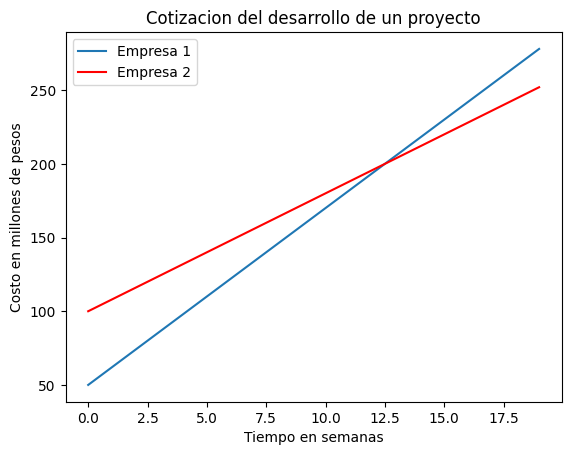

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def c1(t):
    return 12*t+50;
def c2(t):
    return 8*t+100;

t = np.arange(0, 20, 1)
plt.plot(t, c1(t), label="Empresa 1")
plt.plot(t,c2(t), label="Empresa 2", color="red")
plt.xlabel("Tiempo en semanas")
plt.ylabel("Costo en millones de pesos")
plt.title("Cotizacion del desarrollo de un proyecto")
plt.legend()
plt.show()

In [44]:
import matplotlib.pyplot as plt
import numpy as np

def c1(t):
    return 12*t+50;
def c2(t):
    return 8*t+100;

def zeroc1(x):
    return c1(x)-155;

print(fsolve(zeroc1, 0)[0])


8.75


desde la semana 0 hasta la semana 12 trabajar con la primera empresa<br>
luego de la semana 12 trabajar con la segunda empresa